In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("C:/fili/jupyter_proyectos/comprar_alquilar.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [3]:
X = df.drop(columns=["comprar"])
y = df["comprar"]  # 0 = alquilar, 1 = comprar (asumo esto)


In [4]:
pca_no_scaling = PCA(n_components=2)
X_pca_no = pca_no_scaling.fit_transform(X)

print("Varianza explicada sin escalamiento:", pca_no_scaling.explained_variance_ratio_)


Varianza explicada sin escalamiento: [0.98986362 0.0100648 ]


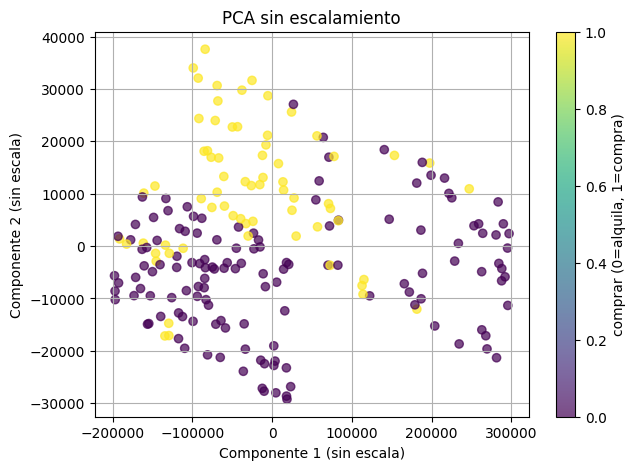

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(
    X_pca_no[:, 0],
    X_pca_no[:, 1],
    c=y,
    cmap="viridis",
    alpha=0.7
)
plt.xlabel("Componente 1 (sin escala)")
plt.ylabel("Componente 2 (sin escala)")
plt.title("PCA sin escalamiento")
plt.colorbar(label="comprar (0=alquila, 1=compra)")
plt.grid(True)
plt.show()


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_scaled = PCA(n_components=2)
X_pca_sc = pca_scaled.fit_transform(X_scaled)

print("Varianza explicada con escalamiento:", pca_scaled.explained_variance_ratio_)


Varianza explicada con escalamiento: [0.29913557 0.23294923]


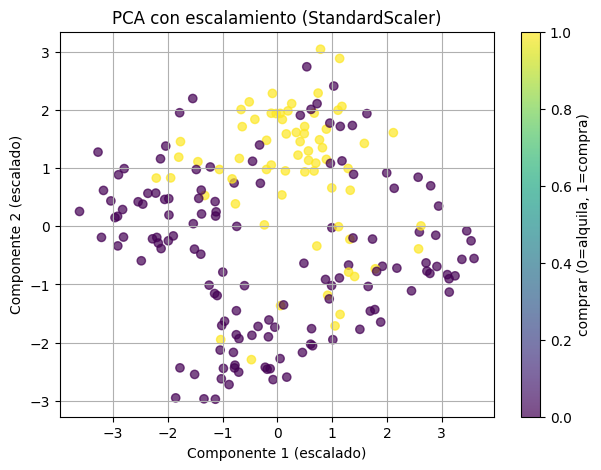

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(
    X_pca_sc[:, 0],
    X_pca_sc[:, 1],
    c=y,
    cmap="viridis",
    alpha=0.7
)
plt.xlabel("Componente 1 (escalado)")
plt.ylabel("Componente 2 (escalado)")
plt.title("PCA con escalamiento (StandardScaler)")
plt.colorbar(label="comprar (0=alquila, 1=compra)")
plt.grid(True)
plt.show()


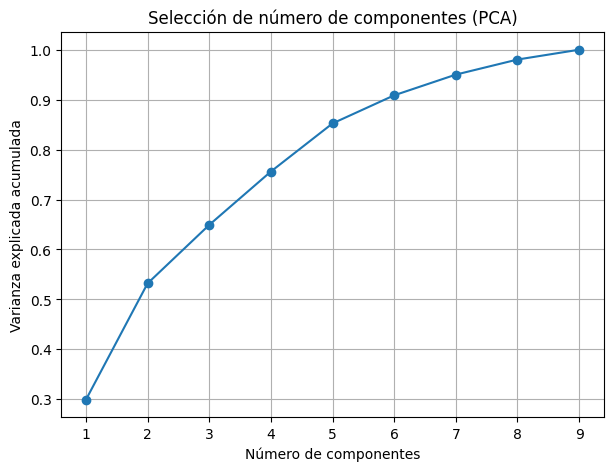

1 componentes -> 0.2991 de varianza explicada acumulada
2 componentes -> 0.5321 de varianza explicada acumulada
3 componentes -> 0.6492 de varianza explicada acumulada
4 componentes -> 0.7561 de varianza explicada acumulada
5 componentes -> 0.8524 de varianza explicada acumulada
6 componentes -> 0.9087 de varianza explicada acumulada
7 componentes -> 0.9502 de varianza explicada acumulada
8 componentes -> 0.9803 de varianza explicada acumulada
9 componentes -> 1.0000 de varianza explicada acumulada


In [8]:
pca_full = PCA()
pca_full.fit(X_scaled)

explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(7,5))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker="o")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Selección de número de componentes (PCA)")
plt.grid(True)
plt.show()

for i, cum in enumerate(cumulative_var, start=1):
    print(f"{i} componentes -> {cum:.4f} de varianza explicada acumulada")


In [9]:
pca_final = PCA(n_components=3)
X_pca_final = pca_final.fit_transform(X_scaled)

X_pca_final[:5]


array([[ 1.32191526, -0.22295045,  1.59986259],
       [ 1.14787775,  1.7169673 ,  0.39572194],
       [ 0.09036864,  1.83606627,  1.35938166],
       [ 3.4558983 , -0.07827948, -0.20238186],
       [ 0.91693305, -1.18467627,  0.19003578]])